<a href="https://colab.research.google.com/github/vivekkuamar-dudhat/devani/blob/main/devani_ai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values (0–255 → 0–1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)


In [3]:
def build_model(hidden_activation):
    model = Sequential()

    # Input layer
    model.add(Flatten(input_shape=(28, 28)))

    # Six hidden layers
    model.add(Dense(128, activation=hidden_activation))
    model.add(Dense(128, activation=hidden_activation))
    model.add(Dense(64, activation=hidden_activation))
    model.add(Dense(64, activation=hidden_activation))
    model.add(Dense(32, activation=hidden_activation))
    model.add(Dense(32, activation=hidden_activation))

    # Output layer
    model.add(Dense(10, activation='softmax'))

    # Compile model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [4]:
sigmoid_model = build_model('sigmoid')

history_sigmoid = sigmoid_model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

sigmoid_test_loss, sigmoid_test_accuracy = sigmoid_model.evaluate(
    X_test, y_test_cat, verbose=0
)

print("Sigmoid Test Accuracy:", sigmoid_test_accuracy)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.1806 - loss: 2.1673 - val_accuracy: 0.5507 - val_loss: 1.2595
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6290 - loss: 1.1184 - val_accuracy: 0.7582 - val_loss: 0.8135
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7777 - loss: 0.7557 - val_accuracy: 0.8652 - val_loss: 0.5681
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8761 - loss: 0.5244 - val_accuracy: 0.9106 - val_loss: 0.4018
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9248 - loss: 0.3559 - val_accuracy: 0.9206 - val_loss: 0.3345
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9370 - loss: 0.2784 - val_accuracy: 0.9364 - val_loss: 0.2685
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9471 - loss: 0.2290 - val_accuracy: 0.9431 - val_loss: 0.2417
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9547 - loss: 0.1929 - val_accuracy: 0

In [5]:
tanh_model = build_model('tanh')

history_tanh = tanh_model.fit(
    X_train, y_train_cat,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=1
)

tanh_test_loss, tanh_test_accuracy = tanh_model.evaluate(
    X_test, y_test_cat, verbose=0
)

print("Tanh Test Accuracy:", tanh_test_accuracy)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - accuracy: 0.8125 - loss: 0.7517 - val_accuracy: 0.9451 - val_loss: 0.1966
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9493 - loss: 0.1799 - val_accuracy: 0.9536 - val_loss: 0.1596
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9653 - loss: 0.1173 - val_accuracy: 0.9622 - val_loss: 0.1356
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9729 - loss: 0.0912 - val_accuracy: 0.9687 - val_loss: 0.1093
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9780 - loss: 0.0727 - val_accuracy: 0.9701 - val_loss: 0.1053
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9852 - loss: 0.0519 - val_accuracy: 0.9663 - val_loss: 0.1190
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9862 - loss: 0.0453 - val_accuracy: 0.9735 - val_loss: 0.0948
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9873 - loss: 0.0408 - val_accuracy: 

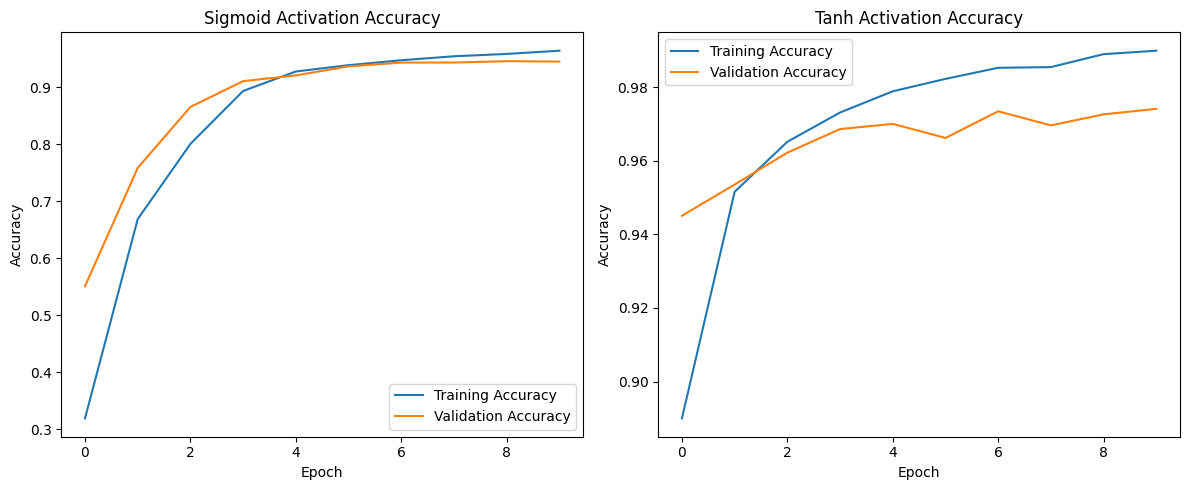

In [6]:
plt.figure(figsize=(12,5))

# Sigmoid accuracy
plt.subplot(1,2,1)
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy')
plt.title('Sigmoid Activation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Tanh accuracy
plt.subplot(1,2,2)
plt.plot(history_tanh.history['accuracy'], label='Training Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Validation Accuracy')
plt.title('Tanh Activation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

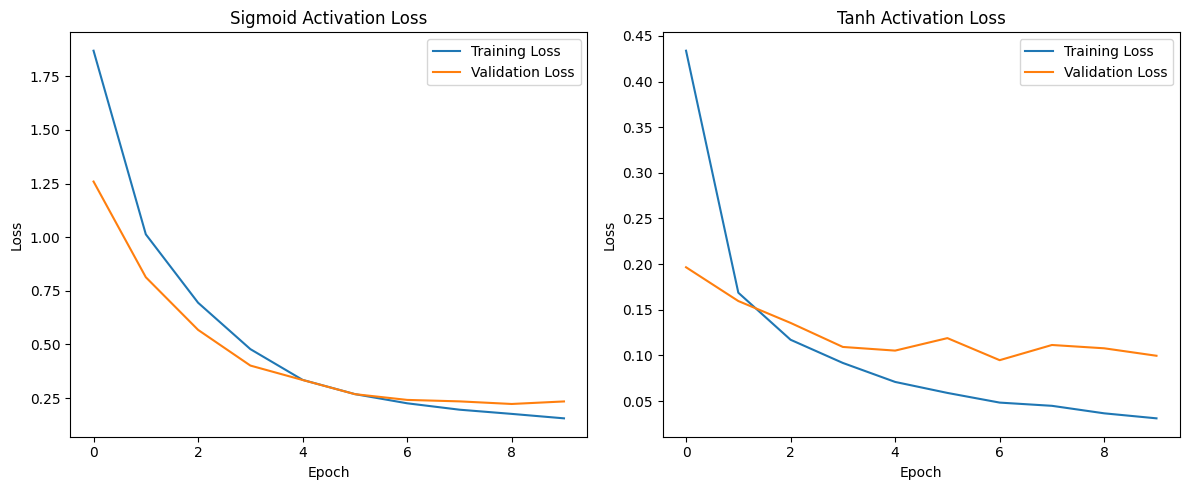

In [7]:
plt.figure(figsize=(12,5))

# Sigmoid loss
plt.subplot(1,2,1)
plt.plot(history_sigmoid.history['loss'], label='Training Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss')
plt.title('Sigmoid Activation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Tanh loss
plt.subplot(1,2,2)
plt.plot(history_tanh.history['loss'], label='Training Loss')
plt.plot(history_tanh.history['val_loss'], label='Validation Loss')
plt.title('Tanh Activation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [8]:
print("Final Comparison")
print(f"Sigmoid Test Accuracy: {sigmoid_test_accuracy:.4f}")
print(f"Tanh Test Accuracy:    {tanh_test_accuracy:.4f}")

Final Comparison
Sigmoid Test Accuracy: 0.9460
Tanh Test Accuracy:    0.9761


In [9]:
def visualize_predictions(model, X_test, y_test, num_images=5):
    """
    Visualize sample predictions with confidence scores
    """
    # Randomly select images
    indices = np.random.choice(len(X_test), num_images, replace=False)

    # Get predictions
    predictions = model.predict(X_test[indices])

    plt.figure(figsize=(12, 4))

    for i, idx in enumerate(indices):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(X_test[idx], cmap='gray')
        plt.axis('off')

        true_label = y_test[idx]
        predicted_label = np.argmax(predictions[i])
        confidence = np.max(predictions[i]) * 100

        plt.title(
            f"True: {true_label}\nPred: {predicted_label}\nConf: {confidence:.1f}%",
            fontsize=10
        )

    plt.suptitle("Sample MNIST Predictions with Confidence", fontsize=14)
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


KeyboardInterrupt: 

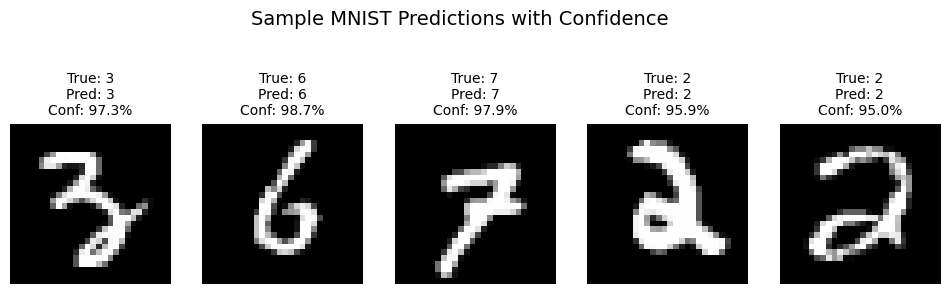

In [10]:
visualize_predictions(
    model=sigmoid_model,
    X_test=X_test,
    y_test=y_test,
    num_images=5
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


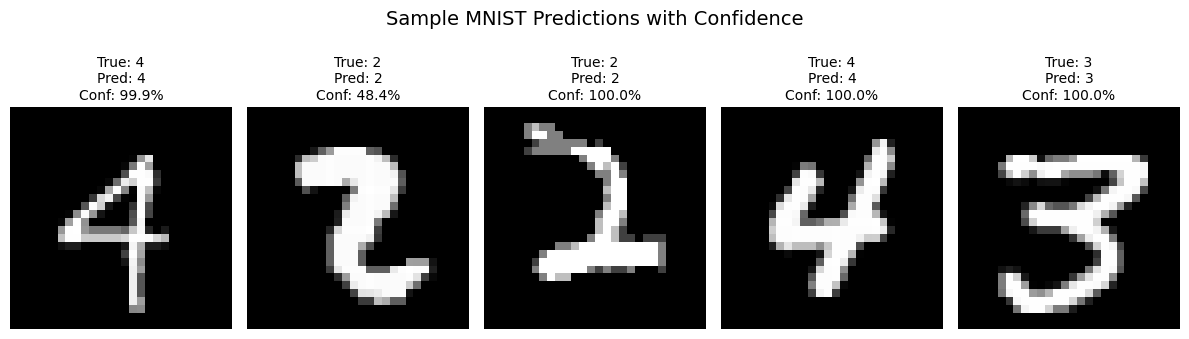

In [11]:
visualize_predictions(
    model=tanh_model,
    X_test=X_test,
    y_test=y_test,
    num_images=5
)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


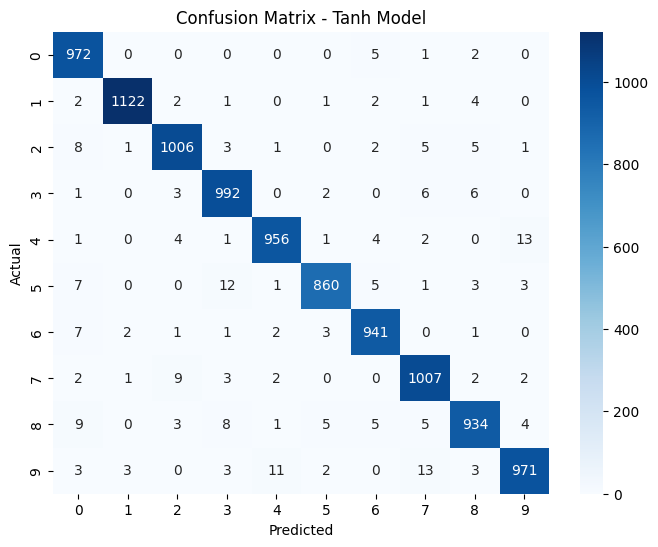

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict labels
y_pred_tanh = np.argmax(tanh_model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred_tanh)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tanh Model")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()